### Step 1:

**Import Basic Scikit Learn Libraries for Data Manipulation as well Data Visualization.**

In [1]:
# Import Data Manipulation Libraries
import numpy as np  
import pandas as pd 

# Import Data Visualization Libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Import Data Filter Warning Libraries
import warnings
warnings.filterwarnings('ignore')

# Import Data Logging Libraries
import logging
logging.basicConfig(level = logging.INFO,
                    filename = 'model.log',
                    filemode = 'w',
                    format = '%(asctime)s - %(levelname)s - %(message)s')

### Step 2:

**Data Uploading using Pandas Function**

In [2]:
# Load the dataset
url = 'https://raw.githubusercontent.com/chandanc5525/CementCompositeStrength_PredictionModel/refs/heads/main/concrete_data.csv'

df = pd.read_csv(url)

df.sample(frac = 1)

,cement,blast_furnace_slag,fly_ash,water,superplasticizer,coarse_aggregate,fine_aggregate,age,concrete_compressive_strength
790,349.0,0.0,0.0,192.0,0.0,1047.0,806.0,90,39.49
643,350.0,0.0,0.0,186.0,0.0,1050.0,770.0,7,20.28
573,316.1,210.7,0.0,185.7,0.0,977.0,689.3,28,38.70
112,439.0,177.0,0.0,186.0,11.1,884.9,707.9,7,56.10
566,255.5,170.3,0.0,185.7,0.0,1026.6,724.3,28,32.05
...,...,...,...,...,...,...,...,...,...
318,251.8,0.0,99.9,146.1,12.4,1006.0,899.8,100,45.37
964,143.7,170.2,132.6,191.6,8.5,814.1,805.3,28,29.87
393,334.0,17.6,158.0,189.0,15.3,967.0,633.0,28,44.33
789,349.0,0.0,0.0,192.0,0.0,1047.0,806.0,28,32.72


### Step 3:

**Doing Exploratory Data Analysis [EDA] :--> **

1. Univariate Analysis 

2. Bi Variate Analysis

In [3]:
from collections import OrderedDict

stats = []

for i in df.columns:
    numerical_stats = OrderedDict({
        'Feature': i,
        'Type': df[i].dtype,
        'Missing Values': df[i].isnull().sum(),
        'Unique Values': df[i].nunique(),
        'Min': df[i].min(),
        'Max': df[i].max(),
        'Mean': df[i].mean(),
        'Median': df[i].median(),
        'Mode': df[i].mode()[0],
        'Standard Deviation': df[i].std(),
        'Kurtosis': df[i].kurtosis(),
        'IQR': df[i].quantile(0.75) - df[i].quantile(0.25)
    })
    
    stats.append(numerical_stats)

df_stats = pd.DataFrame(stats)

df_stats.style.background_gradient(subset=['Missing Values', 'Unique Values', 'Mean', 'Median', 'Mode', 'Standard Deviation', 'Kurtosis', 'IQR'], cmap='Reds')

,Feature,Type,Missing Values,Unique Values,Min,Max,Mean,Median,Mode,Standard Deviation,Kurtosis,IQR
0,cement,float64,0,278,102.000000,540.000000,281.167864,272.900000,362.600000,104.506364,-0.520652,157.625000
1,blast_furnace_slag,float64,0,185,0.000000,359.400000,73.895825,22.000000,0.000000,86.279342,-0.508175,142.950000
2,fly_ash,float64,0,156,0.000000,200.100000,54.188350,0.000000,0.000000,63.997004,-1.328746,118.300000
3,water,float64,0,195,121.800000,247.000000,181.567282,185.000000,192.000000,21.354219,0.122082,27.100000
4,superplasticizer,float64,0,111,0.000000,32.200000,6.204660,6.400000,0.000000,5.973841,1.411269,10.200000
5,coarse_aggregate,float64,0,284,801.000000,1145.000000,972.918932,968.000000,932.000000,77.753954,-0.599016,97.400000
6,fine_aggregate,float64,0,302,594.000000,992.600000,773.580485,779.500000,594.000000,80.175980,-0.102177,93.050000
7,age,int64,0,14,1.000000,365.000000,45.662136,28.000000,28.000000,63.169912,12.168989,49.000000
8,concrete_compressive_strength,float64,0,845,2.330000,82.600000,35.817961,34.445000,33.400000,16.705742,-0.313725,22.425000


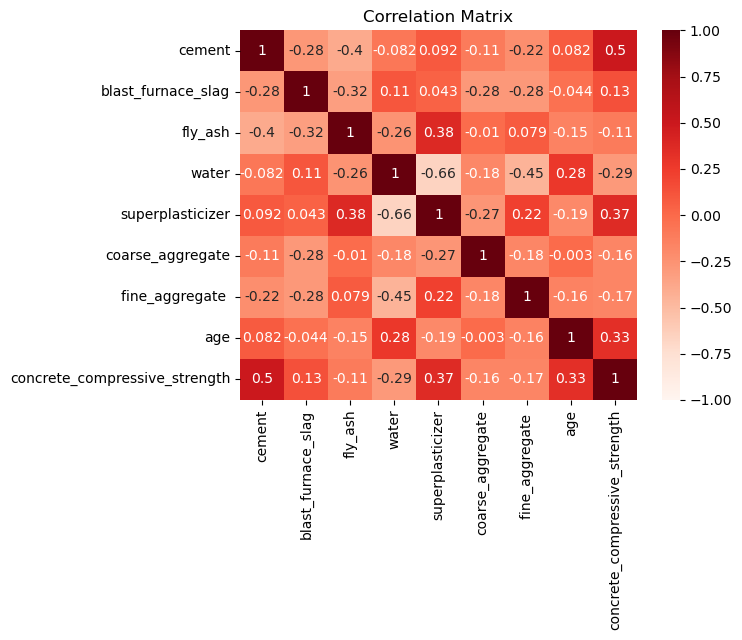

In [4]:
# Checking Correlation Matrix
# X = Independent Variables
# y = Dependent Variable ----> ['concrete_compressive_strength']

sns.heatmap(df.corr(),annot=True,yticklabels=True,center=0,vmax=1,vmin=-1,cmap = 'Reds')
plt.title('Correlation Matrix')
plt.show()

In [5]:
# Understanding Features and Create New Feature Based on Exisiting Feature ---> Feature Engineering

df.corr()['concrete_compressive_strength']

cement                           0.497832
blast_furnace_slag               0.134829
fly_ash                         -0.105755
water                           -0.289633
superplasticizer                 0.366079
coarse_aggregate                -0.164935
fine_aggregate                  -0.167241
age                              0.328873
concrete_compressive_strength    1.000000
Name: concrete_compressive_strength, dtype: float64

In [6]:
df['Composite_Ratio'] = (df['cement'] + df['superplasticizer']+ df['blast_furnace_slag'])/(df['water'])


In [7]:
df['cement_to_water_ratio'] = df['cement']/df['water']

In [8]:
df.corr()['concrete_compressive_strength']

cement                           0.497832
blast_furnace_slag               0.134829
fly_ash                         -0.105755
water                           -0.289633
superplasticizer                 0.366079
coarse_aggregate                -0.164935
fine_aggregate                  -0.167241
age                              0.328873
concrete_compressive_strength    1.000000
Composite_Ratio                  0.620196
cement_to_water_ratio            0.559522
Name: concrete_compressive_strength, dtype: float64

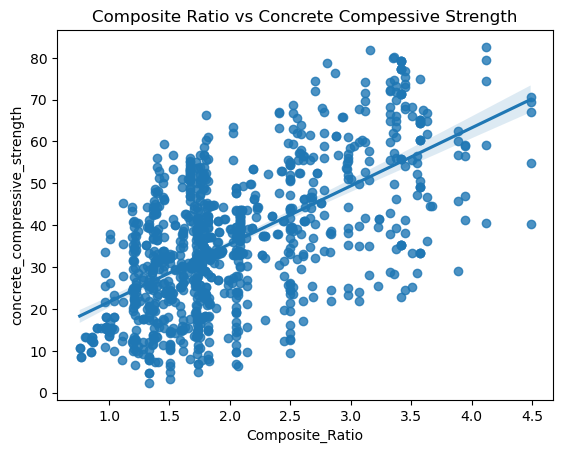

In [9]:
sns.regplot(x = df['Composite_Ratio'], y = df['concrete_compressive_strength'])
plt.title('Composite Ratio vs Concrete Compessive Strength')
plt.show()

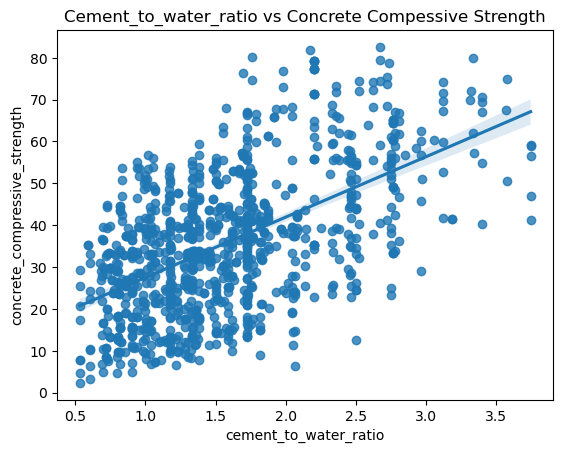

In [10]:
sns.regplot(x = df['cement_to_water_ratio'], y = df['concrete_compressive_strength'])
plt.title('Cement_to_water_ratio vs Concrete Compessive Strength')
plt.show()

## Step 4:

Splitting the dataset into training set and test set 
Also
Using Train and Test Split to Prevent Data Lekage.

In [13]:
from sklearn.model_selection import train_test_split

X = df.drop(columns = 'concrete_compressive_strength',axis =1)
y = df['concrete_compressive_strength']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [14]:
# Using Scaling Technique
from sklearn.preprocessing import MinMaxScaler

scalaer = MinMaxScaler()

X_train = scalaer.fit_transform(X_train)
X_test = scalaer.transform(X_test)

In [16]:
from sklearn.linear_model import LinearRegression

LR = LinearRegression()
LR.fit(X_train, y_train)
y_pred_LR = LR.predict(X_test)


from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error

r2_score_LR = r2_score(y_test, y_pred_LR)

r2_score_LR

0.5941935306287764